# import lib and data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('election_results_2024.csv')
data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [3]:
data.shape

(543, 8)

In [4]:
print("No. of rows",data.shape[0])
print("No. of col",data.shape[1])

No. of rows 543
No. of col 8


Let's see some random sample data

In [5]:
data.sample(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
403,Parbhani,17,JADHAV SANJAY ( BANDU ) HARIBHAU,Shiv Sena (Uddhav Balasaheb Thackrey),JANKAR MAHADEV JAGANNATH,Rashtriya Samaj Paksha,134061,Result Declared
506,Tamluk,30,ABHIJIT GANGOPADHYAY,Bharatiya Janata Party,DEBANGSHU BHATTACHARYA,All India Trinamool Congress,77733,Result Declared
62,Balasore,6,PRATAP CHANDRA SARANGI,Bharatiya Janata Party,LEKHASRI SAMANTSINGHAR,Biju Janata Dal,147156,Result Declared
399,Palakkad,8,V K SREEKANDAN,Indian National Congress,A VIJAYARAGHAVAN,Communist Party of India (Marxist),75283,Result Declared
59,Baghpat,11,DR RAJKUMAR SANGWAN,Rashtriya Lok Dal,AMARPAL,Samajwadi Party,159459,Result Declared
340,Malkajgiri,7,EATALA RAJENDER,Bharatiya Janata Party,PATNAM SUNEETHA MAHENDER REDDY,Indian National Congress,391475,Result Declared
321,MANDLA,14,FAGGAN SINGH KULASTE,Bharatiya Janata Party,OMKAR SINGH MARKAM,Indian National Congress,103846,Result Declared
468,Sasaram,34,MANOJ KUMAR,Indian National Congress,SHIVESH KUMAR,Bharatiya Janata Party,19157,Result Declared
339,Maldaha Uttar,7,KHAGEN MURMU,Bharatiya Janata Party,PRASUN BANERJEE,All India Trinamool Congress,77708,Result Declared
513,Tripura West,1,BIPLAB KUMAR DEB,Bharatiya Janata Party,ASISH KUMAR SAHA,Indian National Congress,611578,Result Declared


# party with highest margin and lowest margin

In [6]:
data.dtypes

Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                object
Status                object
dtype: object

In [13]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin'] = pd.to_numeric(data['Margin'], errors='coerce')
# Party with highest and lowest margin of victory
highest_margin = data.loc[data['Margin'].idxmax()]
lowest_margin = data.loc[data['Margin'].idxmin()]

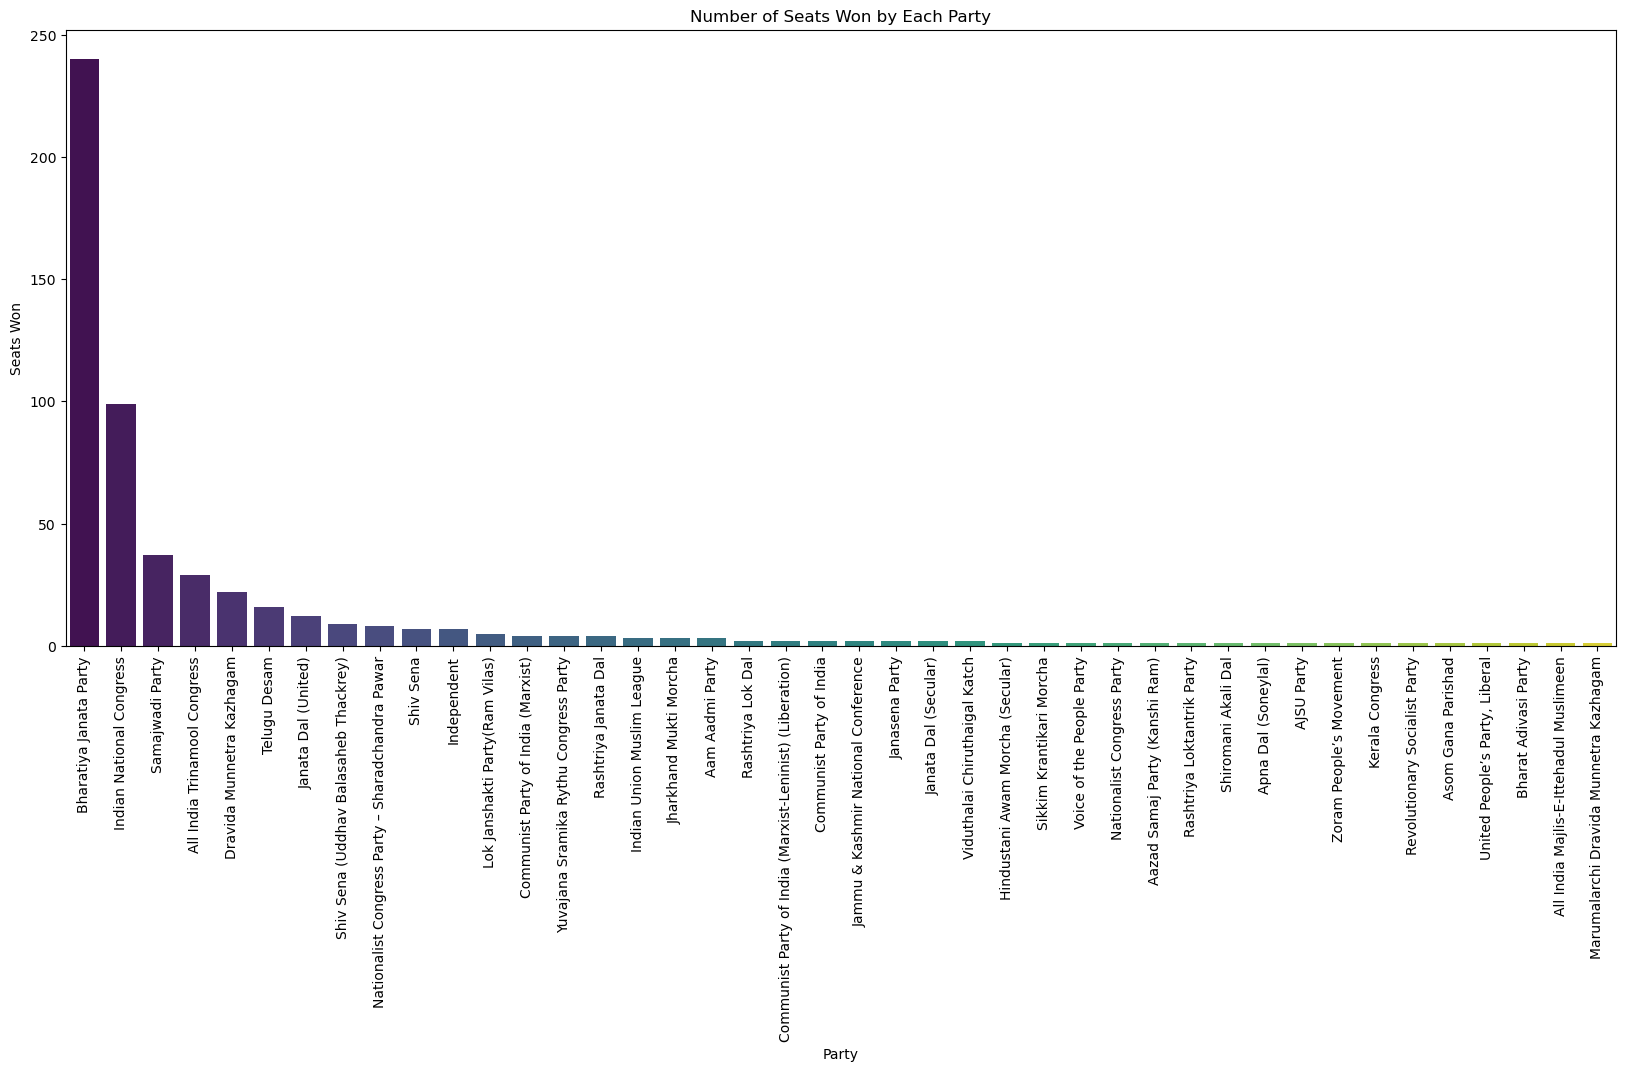

In [14]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
# Number of seats won by each party
seats_won = data['Leading Party'].value_counts()
# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

In [16]:
data['Leading Party'].value_counts()

Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League              

In [17]:
data.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [19]:
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

In [20]:
amit_entries

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716.0,Result Declared


In [21]:
modi_entries

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
533,Varanasi,77,NARENDRA MODI,Bharatiya Janata Party,AJAY RAI,Indian National Congress,152513.0,Result Declared


In [29]:
#  votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

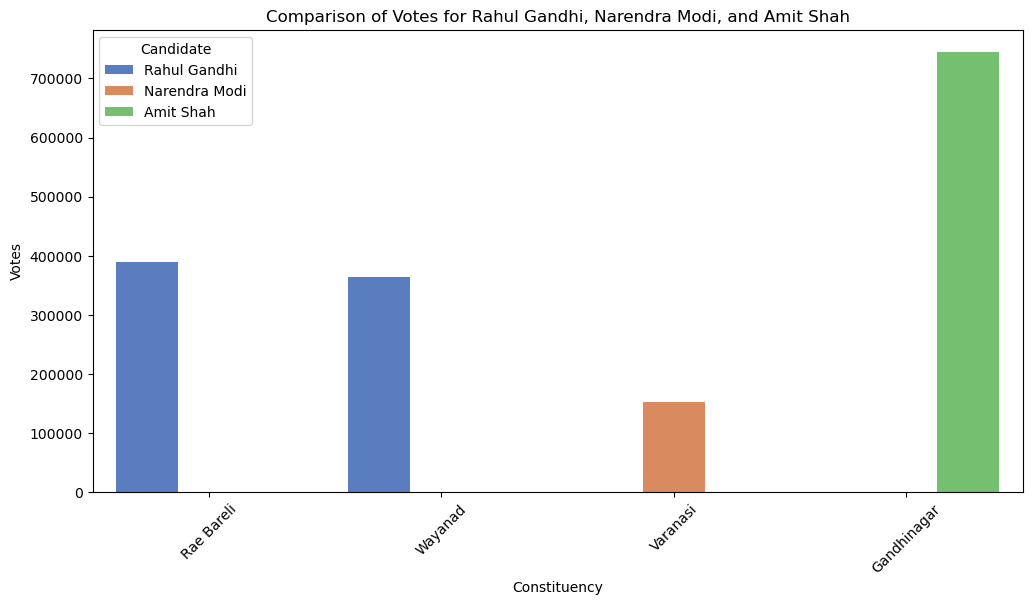

In [50]:
#  constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])
#  constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"
#  constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
 'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
 'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
 'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})
# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

In [53]:
data_to_plot

,Candidate,Constituency,Votes
0,Rahul Gandhi,Rae Bareli,390030.0
1,Rahul Gandhi,Wayanad,364422.0
2,Narendra Modi,Varanasi,152513.0
3,Amit Shah,Gandhinagar,744716.0


In [38]:
data['Leading Candidate']

0           BHAGIRATH CHOUDHARY
1               BHUPENDER YADAV
2                VARUN CHAUDHRY
3              MIAN ALTAF AHMAD
4             S JAGATHRATCHAKAN
                 ...           
538         AMAR SHARADRAO KALE
539                RAHUL GANDHI
540          KAMALJEET SEHRAWAT
541    SANJAY UTTAMRAO DESHMUKH
542        SURESH KUMAR SHETKAR
Name: Leading Candidate, Length: 543, dtype: object

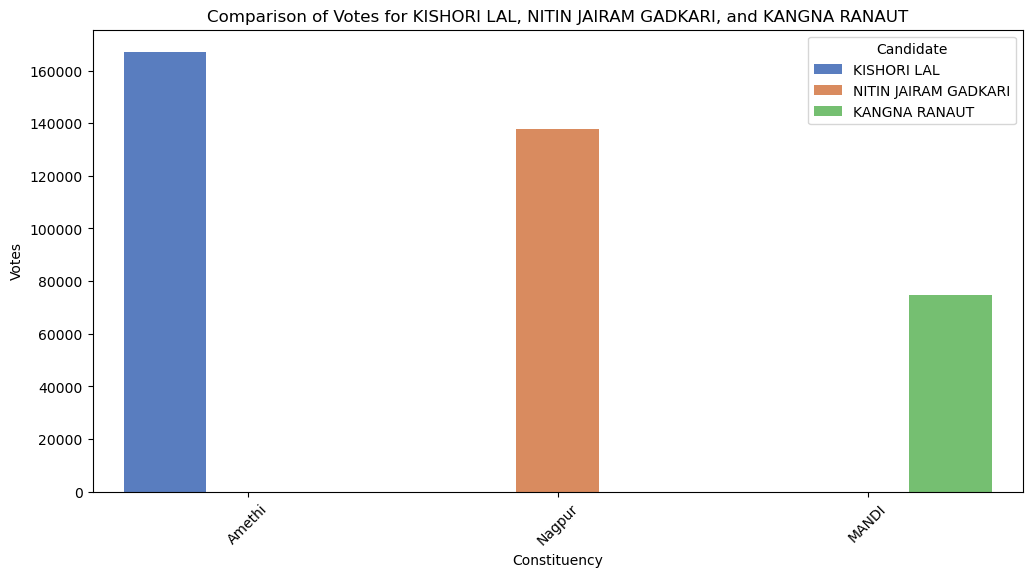

In [61]:

# Extract entries for each candidate
lal_entries = data[data['Leading Candidate'] == 'KISHORI LAL']
nitin_entries = data[data['Leading Candidate'] == 'NITIN JAIRAM GADKARI']
kangna_entries = data[data['Leading Candidate'] == 'KANGNA RANAUT']

# Extract votes and constituencies
lal_votes = lal_entries['Margin'].sum() if not lal_entries.empty else 0
nitin_votes = nitin_entries['Margin'].values[0] if not nitin_entries.empty else 0
kangna_votes = kangna_entries['Margin'].values[0] if not kangna_entries.empty else 0

lal_constituency = lal_entries['Constituency'].values[0] if not lal_entries.empty else "Lal Constituency"
nitin_constituency = nitin_entries['Constituency'].values[0] if not nitin_entries.empty else "Ghadkari Constituency"
kangna_constituency = kangna_entries['Constituency'].values[0] if not kangna_entries.empty else "Kangna Constituency"

# Combine the data
data_to_plot_1 = pd.DataFrame({
    'Candidate': ['KISHORI LAL', 'NITIN JAIRAM GADKARI', 'KANGNA RANAUT'],
    'Constituency': [lal_constituency, nitin_constituency, kangna_constituency],
    'Votes': [lal_votes, nitin_votes, kangna_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot_1, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for KISHORI LAL, NITIN JAIRAM GADKARI, and KANGNA RANAUT')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

In [62]:
data_to_plot_1

,Candidate,Constituency,Votes
0,KISHORI LAL,Amethi,167196.0
1,NITIN JAIRAM GADKARI,Nagpur,137603.0
2,KANGNA RANAUT,MANDI,74755.0


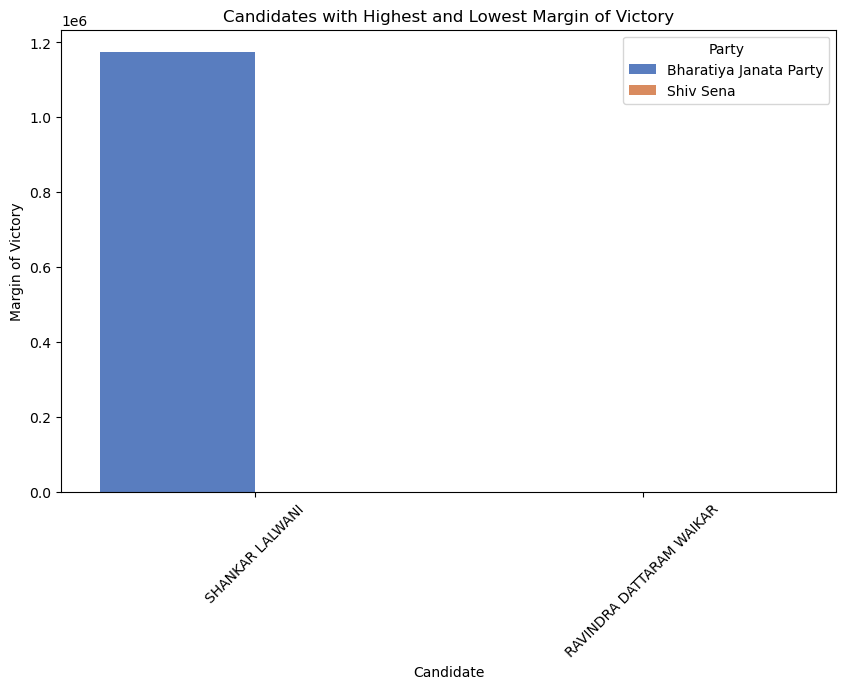

In [64]:
highest_margin_entry = data.loc[data['Margin'].idxmax()]
lowest_margin_entry = data.loc[data['Margin'].idxmin()]
# Combine the data
data_to_plot = pd.DataFrame({
 'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
 'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
 'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

In [65]:
data.loc[data['Margin'].idxmax()]

Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 221, dtype: object

# Votes Dist

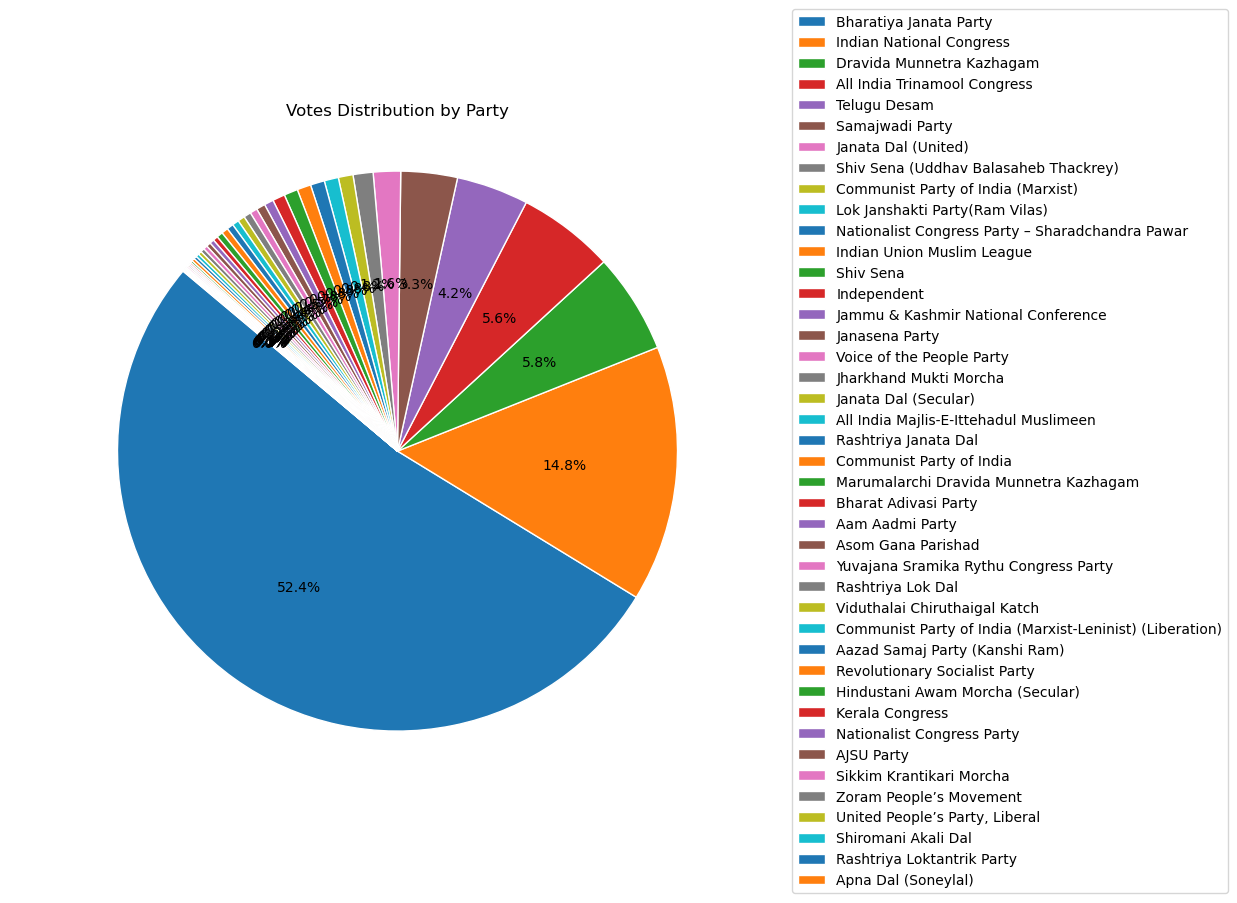

In [68]:
party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')
plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.show()

In [69]:
data

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991.0,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282.0,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036.0,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794.0,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559.0,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648.0,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422.0,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013.0,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473.0,Result Declared


In [70]:
data.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [99]:
trailing_party_votes = data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = data['Trailing Party'].value_counts()

In [100]:

trailing_party_votes


Trailing Party
Indian National Congress                                    35872203.0
Bharatiya Janata Party                                      18160854.0
All India Anna Dravida Munnetra Kazhagam                     5519091.0
Yuvajana Sramika Rythu Congress Party                        4926068.0
Communist Party of India (Marxist)                           2622123.0
Samajwadi Party                                              2365143.0
Biju Janata Dal                                              2236289.0
Rashtriya Janata Dal                                         1962693.0
Bahujan Samaj Party                                          1716321.0
Aam Aadmi Party                                              1277670.0
Shiv Sena (Uddhav Balasaheb Thackrey)                        1131265.0
All India United Democratic Front                            1012476.0
All India Trinamool Congress                                  949763.0
Bharat Rashtra Samith                                         

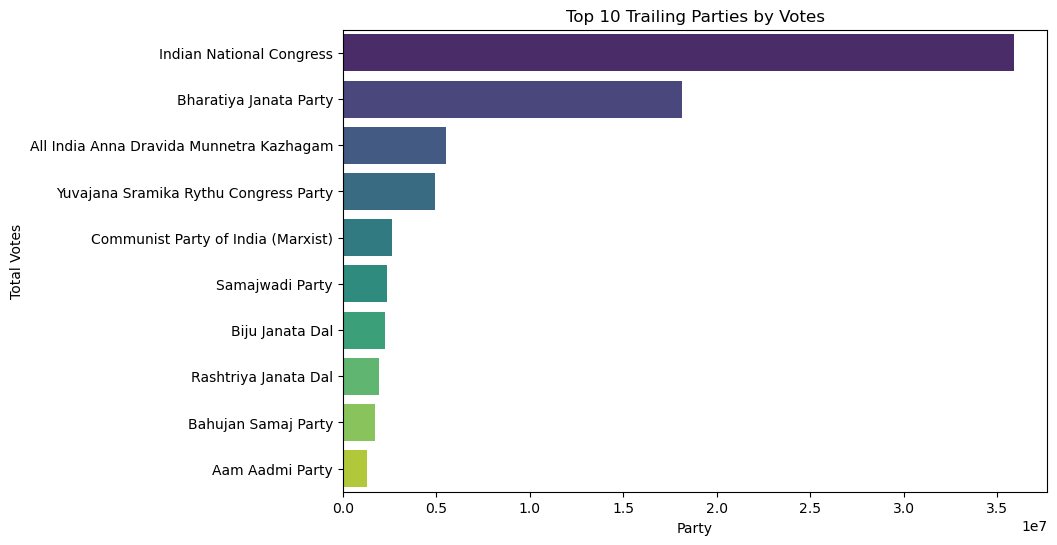

In [119]:
plt.figure(figsize=(20, 6))
# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)

# sns.barplot(x=trailing_party_votes.index,trailing_party_votes.values,palette='viridis')
sns.barplot(y=trailing_party_votes.index[:10], x=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
plt.show()

In [107]:
trailing_party_seats = data['Trailing Party'].value_counts()
trailing_party_seats

Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4
Nationalist Congress Party – Sharadchand

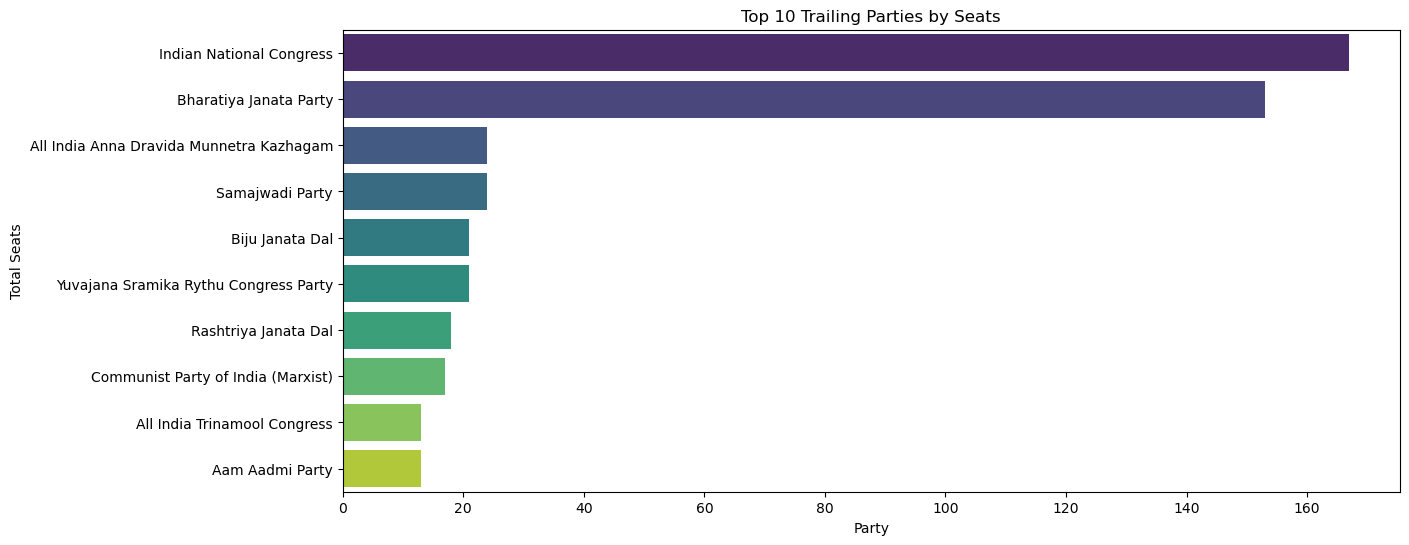

In [117]:
plt.figure(figsize=(30, 6))
# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)

# sns.barplot(x=trailing_party_votes.index,trailing_party_votes.values,palette='viridis')
sns.barplot(x=trailing_party_seats.values[:10],y=trailing_party_seats.index[:10],palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Total Seats')
plt.xticks(rotation=0)
plt.show()

In [121]:
data.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [122]:
leading_party_votes = data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
leading_party_seats = data['Leading Party'].value_counts()

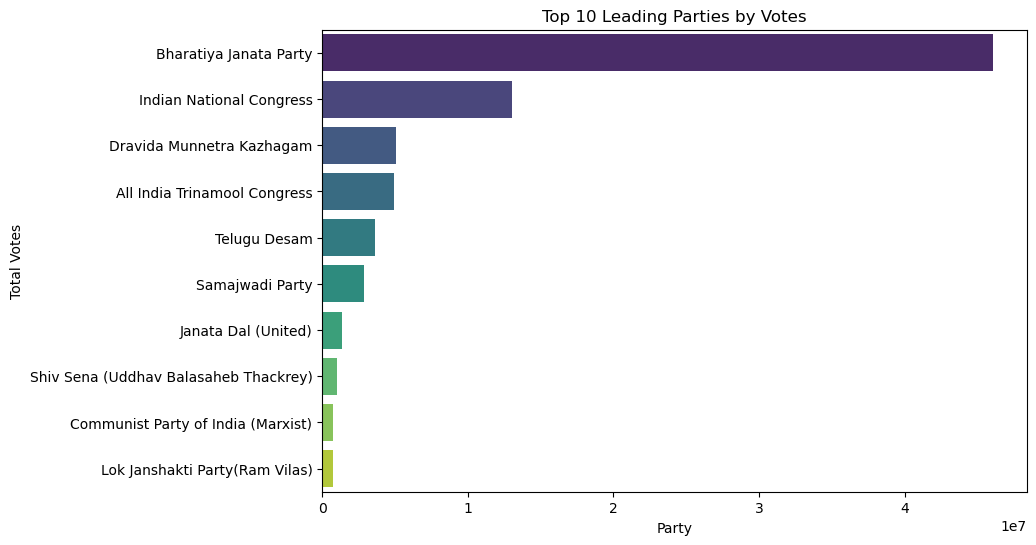

In [123]:
plt.figure(figsize=(20, 6))
# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)

# sns.barplot(x=trailing_party_votes.index,trailing_party_votes.values,palette='viridis')
sns.barplot(y=leading_party_votes.index[:10], x=leading_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Leading Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
plt.show()

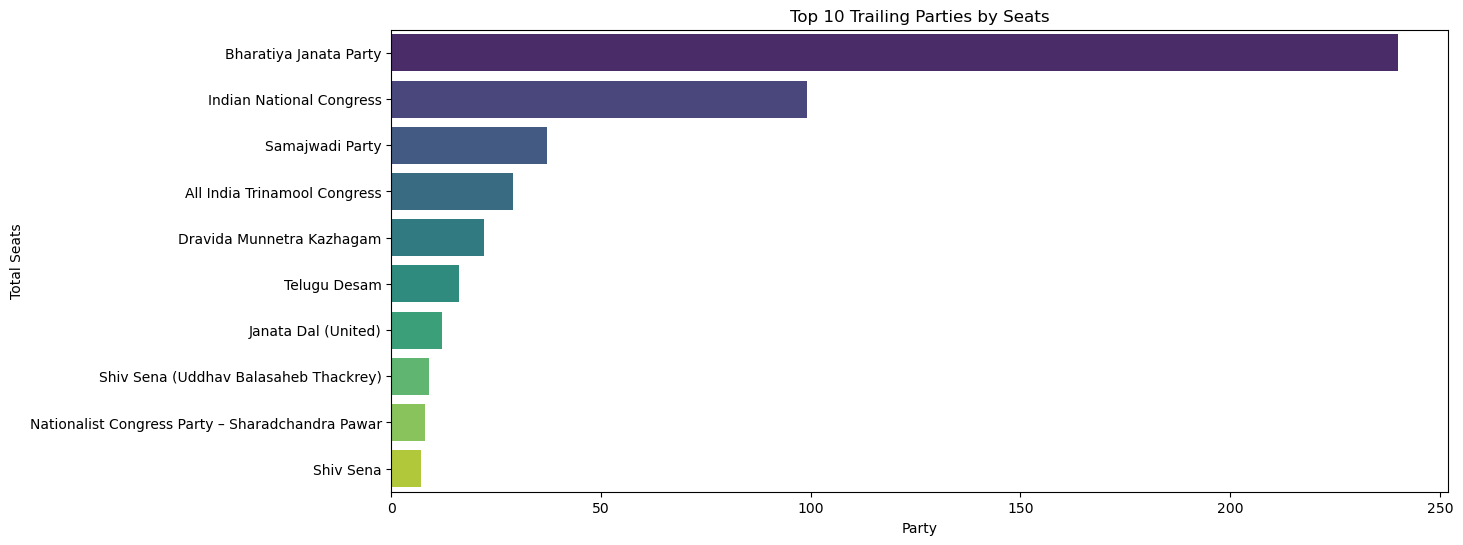

In [124]:
plt.figure(figsize=(30, 6))
# Plot votes distribution by leading party by seats
plt.subplot(1, 2, 1)
sns.barplot(x=leading_party_seats.values[:10],y=leading_party_seats.index[:10],palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Total Seats')
plt.xticks(rotation=0)
plt.show()